# Data Mining Project 1st Semester 2020/2021

## 1) Introduction

This dataset was provided by the Paralyzed Veterans of America (PVA). The original sample has 95412 rows, meaning that it has 95412 contributors, who have made a previous donation to PVA before.
The objective of this project is to recapture a group of donors that is called "lapsed donors", consisting in a group donors who made their last donation between 13 and 24 months ago.
Therefore, it is going to be developed a Customer Segmentation , so that the company can better interpret and analise the differents groups of donors.
This is very important to do so because it will help to recapture the group of "lapsed donors".


This project was developed using the Jupyter Notebook, to which was created a particular enviroment on Conda. Also, it can be found in a github repository (link: https://github.com/its-pedrofonseca/Data-Mining-Project (still private) ).

### 1.1) Setup the Enviroments in Anaconda 

### 1.2) Package Importing

In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
#from pandas_profiling import ProfileReport
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

## 2) Importing, Acessing and Cleaning the Data

### 2.1) Reading the Data

In [2]:
data_original=pd.read_csv("donors.csv")

C:\Users\fonse\anaconda3\envs\DM-DSAA\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option("display.max_columns",485)
pd.set_option("display.max_rows",485)

### 2.2) Make a copy of the original dataset


In [4]:
data = data_original.copy()

In [5]:
data.shape

(95412, 476)

In [6]:
#dataset head
data.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,

In [7]:
#Dropping the column that is making an index
data.drop(["Unnamed: 0"], axis=1, inplace= True)

In [8]:
# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE        0
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN          0
HOMEOWNR        0
CHILD03         0
CHILD07         0
CHILD12         0
CHILD18         0
NUMCHLD     83026
INCOME      21286
GENDER          0
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE        0
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3           0
SOLIH           0
MAJOR           0
WEALTH2     43823
GEOCODE         0
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

In [9]:
# duplicated observations
data.duplicated().sum()

0

In [10]:
# descriptive statistics
data.describe(include="all")  # try with all and without all

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
count,95412,95412,95412.000000,95412,95412,95412,95412,71529,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,12386.000000,74126.000000,95412,50680.000000,95412.000000,42558.000000,42558.000000,42558.000000,42498.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412,95412,95412,51589.000000,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000

### 2.3) Normalize Some Values and replacing empty String for Nans

In the columns that have X marked
0 - doesn't have X
1 - have X marked

In [11]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MAJOR,PEPSTRFL
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0
95409,0,0,1,0,0,0,1
95410,0,1,0,0,0,0,1


In the columns that have Y marked
0 - N
1 - Y

In [12]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# replace " " by nans
data.replace(" ", np.nan, inplace=True)

# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE       928
TCODE           0
STATE           0
ZIP             0
MAILCODE    94013
PVASTATE    93954
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN       2316
HOMEOWNR    22228
CHILD03     94266
CHILD07     93846
CHILD12     93601
CHILD18     92565
NUMCHLD     83026
INCOME      21286
GENDER       2957
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE    21280
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3       95232
SOLIH       89212
MAJOR           0
WEALTH2     43823
GEOCODE     80168
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

### 2.4) Dropping Columns with High percentege of missing values

In [14]:
#if a columns has more than half of missing values the column is removed
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(data_original.shape[1]-data.shape[1],"columns were removed")

76 columns were removed


In [15]:
data.shape

(95412, 400)

In [16]:
# check dataset data types again
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('int32'), dtype('float64')],
      dtype=object)

In [17]:
data["TCODE"]=data["TCODE"].astype(object)
data[X_values]=data[X_values].astype(object)
data[Y_Values]=data[Y_Values].astype(object)

### 2.5) Defining metric and non-metric features

In [18]:
# Define metric and non-metric features
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

In [19]:
data[non_metric_features].shape
#fazer graficos aqui
#histograms
# absolute freqs

(95412, 88)

In [20]:
data[metric_features].shape
#fazer graficos aqui
# pair wise relatioship
#box plot

(95412, 312)

### 2.6) Delete columns with same values


In [21]:
#Remove columns that only have one elements as its variable thus it wouldnt give any new information
remover=[]

def del_columns_with_one_elem(lista):
    for i in range(len(lista)):
        #print(lista[i])
        if len(set(data[lista[i]])) == 1:
            #print(len(set(data[lista[i]])))
            remover.append(lista[i])   
    for r in remover:
        lista.remove(r)


In [22]:
del_columns_with_one_elem(non_metric_features)

In [23]:
data[non_metric_features]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,GENDER,DATASRCE,MAJOR,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,0,0,0,0,0,XXXX,T2,NaN,F,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,2012-08-01,2014-02-01,2015-12-01,2009-11-01,2010-03-01,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,1972-02-01,0,0,0,0,0,XXXX,S1,H,M,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,NaN,NaN,2015-03-01,NaN,NaN,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,F1E,2017-02-01,2013-10-01,2015-12-01,2015-12-01,2013-10-01,2015-04-01,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,NaN,0,0,0,0,0,XXXX,R2,U,M,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,NaN,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,NaN,2015-01-01,2014-11-01,NaN,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,S4D,S3D,2017-02-01,2011-11-01,2012-07-01,2015-12-01,2010-01-01,2011-01-01,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,1948-01-01,0,0,0,0,0,XXXX,R2,U,F,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,NaN,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,NaN,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,NaN,2017-02-01,2007-11-01,2014-11-01,2015-12-01,2007-02-01,2007-11-01,E,X,X,X,C
4,2006-01-01,NaN,0,FL,33176,1940-01-01,0,1,1,0,0,XXXX,S2,H,F,3,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2015-12-01,2016-01-01,2015-11-01,2015-10-01,2015-09-01,2015-08-01,2015-02-01,2015-06-01,2015-03-01,2015-02-01,2014-12-01,2014-11-01,2014-10-01,2015-06-01,2014-06-01,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,L3D,A2D,A2D,A3D,A3D,I4E,A3D,2017-02-01,2013-10-01,2016-01-01,2016-01-01,1999-03-01,2000-05-01,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016-01-01,ASE,1,AK,99504,NaN,0,0,0,0,0,XXXX,C2,NaN,M,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-06-01,2016-06-01,2016-04-01,NaN,2016-03-01,2016-01-01,2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1G,F1G,F1G,NaN,F1G,P1G,P1G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-01,2016-02-01,2016-02-01,2016-02-01,2016-02-01,NaN,G,X,X,X,C
95408,2016-01-01,DCD,1,TX,77379,1970-01-01,0,0,0,0,0,XXXX,C1,H,M,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-06-01,NaN,NaN,NaN,NaN,2016-01-01,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1F,NaN,NaN,NaN,NaN,P1F,P1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### 2.7) Fill missing values (Data imputation)


In [24]:
# Creating a copy to apply central tendency measures imputation
data_central = data.copy()

In [25]:
modes = data_central[non_metric_features].mode().loc[0]
modes.head(10)
#nao há missing values/nans para as metric features??
#nao deveriamos usar o KnnImputer?

ODATEDW     2015-01-01
OSOURCE            MBC
TCODE                0
STATE               CA
ZIP              85351
DOB         1968-01-01
NOEXCH               0
RECINHSE             0
RECP3                0
RECPGVG              0
Name: 0, dtype: object

In [26]:
# checking how many NaNs we still have
data_central.fillna(data_central.median(), inplace=True)
data_central.fillna(modes, inplace=True)
data_central.isna().sum().sum()

0

In [27]:
#lets keep the central imputation
data = data_central.copy()

### 2.8) Feature Grouping

In [28]:
data_corr = data.corr()

corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.75] 
corrdata =corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ["Features1","Features2","corr_value"]
len(corrdata.Features2.unique())

163

In [29]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [30]:
#Example for the first element of correlation the other features that also correlate

for i in correlated_group_list:
    i.reset_index(drop=True,inplace=True)
correlated_group_list[0:1]

[   Features1 Features2  corr_value
 0     HHAGE1    HHAGE3    0.993997
 1     HHAGE1     HHAS1    0.921519
 2     HHAGE1     AGEC6    0.905412
 3     HHAGE1     ETHC3    0.888914
 4     HHAGE1    AGE904    0.852352
 5     HHAGE1    AGE903    0.848423
 6     HHAGE1    HHAGE2    0.834608
 7     HHAGE1     AGEC7    0.823909
 8     HHAGE1    AGE905    0.821628
 9     HHAGE1    AGE902    0.819944
 10    HHAGE1    AGE906    0.815876
 11    HHAGE1    AGE901    0.791534
 12    HHAGE1     MARR3    0.775417]

In [31]:
#List of elements that present correlation between themselves, without repeated features

correlated_group =[]
for i in range(len(correlated_group_list)):
    aux = correlated_group_list[i].Features1.unique()
    aux=np.append(aux,correlated_group_list[i].Features2.unique(),axis=0)
    correlated_group.append(aux)
correlated_group

[array(['HHAGE1', 'HHAGE3', 'HHAS1', 'AGEC6', 'ETHC3', 'AGE904', 'AGE903',
        'HHAGE2', 'AGEC7', 'AGE905', 'AGE902', 'AGE906', 'AGE901', 'MARR3'],
       dtype=object),
 array(['HV2', 'HV1', 'HVP1', 'HVP2', 'HVP6', 'HVP3'], dtype=object),
 array(['ETHC5', 'ETH2', 'ETHC4', 'ETHC6'], dtype=object),
 array(['POP902', 'POP901', 'POP903'], dtype=object),
 array(['HHD7', 'HHD9'], dtype=object),
 array(['LFC5', 'LFC3', 'LFC1', 'LFC4', 'LFC2'], dtype=object),
 array(['AFC1', 'AFC2', 'AFC3'], dtype=object),
 array(['IC3', 'IC1', 'IC4', 'IC2', 'IC5', 'IC11', 'IC12', 'IC20', 'HV3'],
       dtype=object),
 array(['DW4', 'DW5', 'DW6', 'HUPA6', 'HUPA2', 'HU2', 'HU1', 'DW1', 'DW2'],
       dtype=object),
 array(['RHP2', 'RHP1', 'HUR2', 'HHD3', 'VOC2', 'DW1', 'HHD2', 'HU1'],
       dtype=object),
 array(['IC14', 'IC23', 'IC5'], dtype=object),
 array(['HHP2', 'HHP1', 'RHP3', 'HHN3', 'HHN4', 'HHD1', 'HHD2', 'HHN5',
        'HHD4', 'AGE907', 'HHD5'], dtype=object),
 array(['ETH5', 'LSC2', 'ETH13'], 

In [32]:
import random
correlated_drop = list(correlated_group)
for i in range(len(correlated_drop)):
    correlated_drop[i] = list(correlated_drop[i])
    radomIndex = random.randrange(len(correlated_drop[i])-1)
    obj = correlated_drop[i][radomIndex]
    correlated_drop[i].remove(obj)
correlated_drop

[['HHAGE1',
  'HHAGE3',
  'HHAS1',
  'AGEC6',
  'ETHC3',
  'AGE904',
  'AGE903',
  'HHAGE2',
  'AGEC7',
  'AGE905',
  'AGE902',
  'AGE906',
  'MARR3'],
 ['HV2', 'HV1', 'HVP1', 'HVP6', 'HVP3'],
 ['ETHC5', 'ETHC4', 'ETHC6'],
 ['POP901', 'POP903'],
 ['HHD9'],
 ['LFC5', 'LFC3', 'LFC4', 'LFC2'],
 ['AFC1', 'AFC3'],
 ['IC3', 'IC1', 'IC4', 'IC2', 'IC11', 'IC12', 'IC20', 'HV3'],
 ['DW4', 'DW5', 'DW6', 'HUPA6', 'HUPA2', 'HU2', 'DW1', 'DW2'],
 ['RHP2', 'RHP1', 'HUR2', 'HHD3', 'DW1', 'HHD2', 'HU1'],
 ['IC23', 'IC5'],
 ['HHP2',
  'HHP1',
  'RHP3',
  'HHN3',
  'HHN4',
  'HHD2',
  'HHN5',
  'HHD4',
  'AGE907',
  'HHD5'],
 ['LSC2', 'ETH13'],
 ['EIC1'],
 ['AFC4'],
 ['IC19'],
 ['IC21', 'IC4'],
 ['NUMPROM', 'NGIFTALL'],
 ['HV3', 'RP1', 'RP2', 'RP3'],
 ['HC17'],
 ['HC7', 'HC6', 'HC2'],
 ['IC13'],
 ['MARR1', 'HHD3', 'HHD5', 'HU1'],
 ['CARDGIFT', 'CARDPROM'],
 ['HVP4', 'HVP5', 'RP2', 'RP1'],
 ['TPE4'],
 ['HHN5'],
 ['HHN1', 'HHD11', 'HHD2'],
 ['IC6', 'HHAS4'],
 ['RP3'],
 ['HC5'],
 ['IC18'],
 ['IC7'],
 ['LSC3

In [33]:
flat_list = []
for sublist in correlated_drop:
    for item in sublist:
        flat_list.append(item)
correlated_drop=flat_list

In [34]:
data.drop(correlated_drop,inplace=True, axis=1)

In [35]:
data["TCODE"]=data["TCODE"].astype(object)
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

In [36]:
data[metric_features].shape

(95412, 218)

In [37]:
data[metric_features].head()
#confirmar se do noexch até ao recsweep, major, collect1 ate PEPSTRFL 
#não sao vars nao numericas
#nao deveriam ser variaveis categoricas? mesmo depois de converter
# 

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP902,POP90C1,POP90C2,POP90C4,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,AGE901,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHN2,HHN6,MARR2,MARR4,DW7,DW8,DW9,HV4,HU3,HU4,HU5,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,HVP2,HUR1,RHP4,HUPA1,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC9,IC10,IC14,IC15,IC16,IC17,IC22,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC1,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC2,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC20,MHUC1,MHUC2,AC1,AC2,CARDPM12,NUMPRM12,RAMNTALL,MAXRAMNT,TIMELAG,CONTROLN,HPHONE_D,RFA_2F
0,0,0,0,0,0,4.0,6.0,0,0,39,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,264,0,35,47,1,0,0,11,0,0,0,0,0,0,0,0,0,0,39,31,42,27,11,14,18,17,13,25,18,33,4,7,19,7,7,0,2,96,4,7,6,2,9,3,17,50,7,1,4,2,0,14,0,73,0.0,177.0,682.0,23,15,1,4,25,24,0,4,51,46,3,88,8,0,0,0,0,0,4,1,13,16,2,45,56,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,5,20,3,4,0,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,4,96,19,13,5,14,46,0,0,90,0,10,0,0,0,65,99,6,2,10,7,6,14,240.0,12.0,4.0,95515,0,4
1,0,0,0,0,0,6.0,9.0,16,0,15,0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,940,99,0,50,0,0,31,6,4,2,6,4,14,0,0,0,1,4,34,33,46,21,13,14,33,23,10,22,15,21,9,4,24,0,0,0,10,97,3,9,4,1,5,2,18,44,98,0,5,0,0,4,0,94,4480.0,13.0,803.0,5,15,33,2,5,2,10,2,66,56,9,80,14,0,0,0,0,0,6,0,2,32,12,71,70,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,14,24,4,10,0,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,16,99,53,5,2,26,0,0,0,96,0,4,0,0,0,0,99,20,4,6,5,6,13,47.0,25.0,18.0,148535,0,2
2,0,0,0,0,0,3.0,1.0,2,0,20,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2040,0,2,49,2,0,0,2,0,0,0,0,0,0,0,0,0,0,35,35,40,25,13,20,19,16,13,22,19,35,2,9,19,3,3,0,1,93,7,18,7,2,11,3,17,60,1,4,5,4,24,11,6,44,0.0,281.0,518.0,15,12,1,20,19,24,0,8,31,38,8,74,22,0,0,0,0,2,2,1,21,24,6,61,65,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,0,11,33,4,3,2,12,3,3,2,0,7,8,3,3,6,7,1,8,74,3,1,120,22,20,28,16,6,5,1,23,1,6,0,21,0,28,23,32,8,1,14,1,5,0,0,7,0,0,0,0,0,1,0,0,2,84,96,0,92,29,9,3,12,31,0,0,0,6,35,44,0,15,77,97,9,2,6,5,6,14,202.0,16.0,12.0,15078,1,4
3,0,0,0,0,0,1.0,4.0,2,0,23,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,160,0,8,54,0,0,11,32,6,2,0,0,0,0,0,0,0,1,32,45,35,20,15,25,17,17,12,14,19,27,8,9,23,2,0,2,1,93,7,6,6,3,21,4,13,36,25,15,5,4,9,42,5,34,9340.0,67.0,862.0,26,22,4,35,5,6,0,14,26,46,3,58,36,0,0,0,0,6,0,0,17,15,0,43,69,33,31,0,99,23,17,3,0,6,6,0,0,13,42,12,0,0,0,0,6,3,0,0,0,23,3,3,6,0,3,3,3,3,3,0,3,6,87,0,0,120,28,12,14,27,10,3,0,19,1,0,0,23,0,14,40,31,16,0,1,0,13,0,0,4,0,0,0,3,0,0,0,0,29,67,56,0,94,27,4,0,10,55,0,0,45,22,17,0,0,16,77,93,16,2,6,6,6,14,109.0,11.0,9.0,172556,1,4
4,0,1,1,0,0,3.0,2.0,60,1,28,0,5.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,627,99,0,46,98,0,0,1,0,0,0,0,0,0,0,0,0,0,33,34,43,23,14,21,13,15,20,19,19,26,14,17,33,0,0,0,3,97,3,0,20,3,9,1,1,1,1,2,6,0,0,9,0,83,5000.0,127.0,528.0,13,4,2,21,30,22,0,8,11,20,4,73,22,1,0,0,0,3,1,2,1,27,3,76,61,80,31,81,99,10,17,8,2,6,15,3,7,22,2,9,0,7,2,0,6,1,5,2,2,12,2,7,6,4,15,29,4,3,26,3,2,7,49,12,1,120,16,20,30,13,3,12,2,26,1,7,1,28,4,9,16,53,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,99,0,90,18,25,0,1,67,0,0,9,14,72,3,0,0,1,99,6,2,7,11,10,25,254.0,15.0,14.0,7112,1,2


In [66]:
data[metric_features].shape

(95412, 218)

In [39]:
data[non_metric_features].shape

(95412, 63)

In [40]:
data.shape

(95412, 281)

### 2.9) Outlier Removal

In [41]:
data_out = data.copy()
data_out

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP902,POP90C1,POP90C2,POP90C4,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,AGE901,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHN2,HHN6,MARR2,MARR4,DW7,DW8,DW9,HV4,HU3,HU4,HU5,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,HVP2,HUR1,RHP4,HUPA1,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC9,IC10,IC14,IC15,IC16,IC17,IC22,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC1,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC2,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC20,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,CARDPM12,NUMPRM12,RAMNTALL,MINRDATE,MAXRAMNT,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,0,0,0,0,0,XXXX,T2,H,4.0,F,6.0,0,3,0,39,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,264,0,35,47,1,0,0,11,0,0,0,0,0,0,0,0,0,0,39,31,42,27,11,14,18,17,13,25,18,33,4,7,19,7,7,0,2,96,4,7,6,2,9,3,17,50,7,1,4,2,0,14,0,73,0.0,177.0,682.0,23,15,1,4,25,24,0,4,51,46,3,88,8,0,0,0,0,0,4,1,13,16,2,45,56,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,5,20,3,4,0,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,4,96,19,13,5,14,46,0,0,90,0,10,0,0,0,65,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,6,14,240.0,2012-08-01,12.0,2014-02-01,2015-12-01,2009-11-01,2010-03-01,4.0,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,1972-02-01,0,0,0,0,0,XXXX,S1,H,6.0,M,9.0,16,3,0,15,0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,940,99,0,50,0,0,31,6,4,2,6,4,14,0,0,0,1,4,34,33,46,21,13,14,33,23,10,22,15,21,9,4,24,0,0,0,10,97,3,9,4,1,5,2,18,44,98,0,5,0,0,4,0,94,4480.0,13.0,803.0,5,15,33,2,5,2,10,2,66,56,9,80,14,0,0,0,0,0,6,0,2,32,12,71,70,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,14,24,4,10,0,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,16,99,53,5,2,26,0,0,0,96,0,4,0,0,0,0,99,20,4,6,5,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,A1F,A1F,L1E,A1E,A1E,N1E,N1E,N1E,F1E,2017-02-01,6,13,47.0,2013-10-01,25.0,2015-12-01,2015-12-01,2013-10-01,2015-04-01,18.0,148535,0,L,2,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,1968-01-01,0,0,0,0,0,XXXX,R2,U,3.0,M,1.0,2,3,0,20,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2040,0,2,49,2,0,0,2,0,0,0,0,0,0,0,0,0,0,35,35,40,25,13,20,19,16,13,22,19,35,2,9,19,3,3,0,1,93,7,18,7,2,11,3,17,60,1,4,5,4,24,11,6,44,0.0,281.0,518.0,15,12,1,20,19,24,0,8,31,38,8,74,22,0,0,0,0,2,2,1,21,24,6,61,65,78,62,8

In [42]:
#Isto não está a funcionar
q25 = data_out.quantile(.25)
q75 = data_out.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(data_out[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0))
data_out = data[filters]
print('Percentage of data kept after removing outliers:', np.round(data_out.shape[0] / data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.0003


In [43]:
#Combinar diferentes metodos de outliers para que a decisão seja mais robusta
#deve - se retirar no maximo ate 3 %, se nao a data fica corrompida
#pode-se usar metodos pessoais, iqr outliers, zscore

In [44]:
data_out.shape

(32, 281)

### 2.10) Feature Engeneering

Variable selection: Redundancy VS Relevancy

Redundancy

Correlation matrix...

Relevancy

Selecting variables based on the relevancy of each one to the task. Example: remove uncorrelated variables with the target, stepwise regression, use variables for product clustering, use variables for socio-demographic clustering
Variables that aren't correlated with any other variable are often also not relevant. In this case we will not focus on this a lot since we don't have a defined task yet.

### 2.11) Data Standardization

In [45]:
standard = data.copy()

In [46]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(standard[metric_features])
scaled_feat

array([[-1.91563249e-02, -2.74884827e-01, -1.46957290e-01, ...,
        -4.76042798e-03, -1.00123751e+00,  1.94822609e+00],
       [-1.91563249e-02, -2.74884827e-01, -1.46957290e-01, ...,
         9.54282083e-01, -1.00123751e+00,  8.38474084e-02],
       [-1.91563249e-02, -2.74884827e-01, -1.46957290e-01, ...,
        -1.45973030e+00,  9.98764022e-01,  1.94822609e+00],
       ...,
       [-1.91563249e-02, -2.74884827e-01,  6.80469813e+00, ...,
         1.69782040e+00,  9.98764022e-01,  1.01603675e+00],
       [-1.91563249e-02,  3.63788723e+00, -1.46957290e-01, ...,
        -1.64757746e+00,  9.98764022e-01,  1.94822609e+00],
       [-1.91563249e-02,  3.63788723e+00, -1.46957290e-01, ...,
         1.61593459e+00,  9.98764022e-01, -8.48341933e-01]])

In [47]:
standard[metric_features] = scaled_feat
standard.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP902,POP90C1,POP90C2,POP90C4,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,AGE901,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHN2,HHN6,MARR2,MARR4,DW7,DW8,DW9,HV4,HU3,HU4,HU5,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,HVP2,HUR1,RHP4,HUPA1,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC9,IC10,IC14,IC15,IC16,IC17,IC22,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC1,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC2,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC20,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,CARDPM12,NUMPRM12,RAMNTALL,MINRDATE,MAXRAMNT,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,-0.019156,-0.274885,-0.146957,-0.034587,-0.1313,XXXX,T2,H,0.054029,F,0.171607,-0.356881,3,-0.206977,0.745798,-0.055596,0.011930,-0.240136,-0.350256,-0.320166,-0.299729,-0.09687,-0.420329,-0.383872,-0.393519,-0.351292,-0.229805,-0.306142,-0.28419,-0.404251,-0.147366,-0.351668,-0.127914,-0.105028,-0.076837,1.052458,-0.412177,-1.235273,0.684696,-0.217719,-0.387486,-0.223937,-0.411007,0.256922,-0.318003,-0.178012,-0.241859,-0.243155,-0.249707,-0.199512,-0.058468,-0.233968,-0.102047,-0.449775,0.542821,-1.043796,0.570857,1.027129,-0.197237,-1.051630,-0.427141,0.681650,0.275532,1.149868,0.486159,-0.076580,0.027298,-0.816497,-0.444526,0.882053,1.372488,-0.156494,-0.835816,0.465714,-0.519690,-0.321105,-0.353743,0.334768,-0.648917,-0.442066,0.035937,-0.054125,-0.440457,-0.510811,-0.331514,-0.637539,-0.593674,0.364485,-0.533671,-0.145106,-1.232565,-0.075511,0.155099,0.626834,-0.098231,-0.191477,-0.874767,0.989500,0.990253,-0.483565,-0.338264,0.471262,-0.147841,-0.904544,0.895769,-0.746148,-0.429073,-0.206928,-0.138679,-0.343702,-0.741218,0.202299,-0.203281,-0.278098,-1.164948,-0.618802,-0.864418,-0.627254,-0.128786,0.243106,0.939209,-1.401205,-0.717487,-0.622342,-1.344233,1.738274,0.107748,-1.133843,-0.421214,0.718882,-0.256270,0.028142,0.618443,2.160262,0.306458,0.086618,-0.292224,-0.827599,2.363671,-1.024576,-1.162464,0.849349,-0.634092,-0.184685,0.103889,-1.018332,1.099332,0.211809,-0.756187,-1.258025,-0.388224,0.700961,-0.528229,-0.525493,-0.191628,0.685501,-0.938287,-0.480644,-0.452344,0.873309,-0.374350,1.001517,0.029293,0.428334,-1.034951,0.332656,-0.27016,0.81935,-0.495530,-0.216497,0.737899,-0.780437,0.235691,0.521963,-0.901694,0.437362,0.122217,-0.344714,-0.636455,1.550839,-0.269449,-0.333052,0.045006,-0.322441,-0.362632,-0.462590,-0.193820,-0.277806,-0.743523,1.007809,-0.201563,-0.375798,0.779032,0.014260,0.121198,0.336945,-0.093485,1.536476,0.402294,0.093516,0.315814,-0.356914,-0.385986,1.069709,-0.569963,-0.707898,-0.471679,-0.143765,-0.509344,1.866657,0.149432,-0.598374,-0.382472,1.454234,0.313229,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01

In [48]:
# Checking mean and variance of standardized variables
standard[metric_features].describe().round(2)

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP902,POP90C1,POP90C2,POP90C4,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,AGE901,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHN2,HHN6,MARR2,MARR4,DW7,DW8,DW9,HV4,HU3,HU4,HU5,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,HVP2,HUR1,RHP4,HUPA1,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC9,IC10,IC14,IC15,IC16,IC17,IC22,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC1,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC2,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC20,MHUC1,MHUC2,AC1,AC2,CARDPM12,NUMPRM12,RAMNTALL,MAXRAMNT,TIMELAG,CONTROLN,HPHONE_D,RFA_2F
count,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.0,95412.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00

In [49]:
data = standard.copy()

### 2.12) One-hot encoding

In [50]:
df_ohc =  data.copy()

In [51]:
df_ohc[non_metric_features]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,MDMAUD,DOMAIN,HOMEOWNR,GENDER,DATASRCE,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,XXXX,T2,H,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,2012-08-01,2014-02-01,2015-12-01,2009-11-01,2010-03-01,L,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,1972-02-01,XXXX,S1,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,A1F,A1F,L1E,A1E,A1E,N1E,N1E,N1E,F1E,2017-02-01,2013-10-01,2015-12-01,2015-12-01,2013-10-01,2015-04-01,L,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,1968-01-01,XXXX,R2,U,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,A1F,S4F,S4F,S4F,S4F,S4F,A1E,S4D,S4D,A1E,S4D,S3D,2017-02-01,2011-11-01,2012-07-01,2015-12-01,2010-01-01,2011-01-01,L,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,1948-01-01,XXXX,R2,U,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,A1F,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1E,2017-02-01,2007-11-01,2014-11-01,2015-12-01,2007-02-01,2007-11-01,L,E,X,X,X,C
4,2006-01-01,MBC,0,FL,33176,1940-01-01,XXXX,S2,H,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2015-12-01,2016-01-01,2015-11-01,2015-10-01,2015-09-01,2015-08-01,2015-02-01,2015-06-01,2015-03-01,2015-02-01,2014-12-01,2014-11-01,2014-10-01,2015-06-01,2014-06-01,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,L3D,A2D,A2D,A3D,A3D,I4E,A3D,2017-02-01,2013-10-01,2016-01-01,2016-01-01,1999-03-01,2000-05-01,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016-01-01,ASE,1,AK,99504,1968-01-01,XXXX,C2,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-01-01,2015-12-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L1G,F1G,F1G,A1F,F1G,P1G,P1G,A1F,A1F,A1F,A1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,2017-02-01,2016-02-01,2016-02-01,2016-02-01,2016-02-01,2015-04-01,L,G,X,X,X,C
95408,2016-01-01,DCD,1,TX,77379,1970-01-01,XXXX,C1,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-01-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L1F,A1F,A1F,A1F,A1F,P1F,P1F,A1F,A1F,A1F,A1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,2017-02-01,2016-03-01,2016-03-01,2016-03-01,2016-03-01,2015-04-01,L,F,X,X,X,A
95409,2015-01-01,MBC,1,MI,48910,1958-01-01,XXXX,C3,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,20

In [52]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
#ohc = OneHotEncoder(sparse=False, drop="first")
#ohc_feat = ohc.fit_transform(df_ohc[non_metric_features].astype(str))
#ohc_feat_names = ohc.get_feature_names()
#ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
#ohc_df

### 2.13) Dimensionality Reduction

In [53]:
df_pca = data.copy()

In [54]:
# Use PCA to reduce dimensionality of data
#pca = PCA()
#pca_feat = pca.fit_transform(df_pca[metric_features])
#pca_feat

In [55]:
#cov_matrix = df_pca[metric_features].cov()
#cov_matrix

In [56]:
# Composing back the covariance matrix
#pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
#             index=cov_matrix.index, 
#             columns=cov_matrix.columns)

In [57]:
# Obtaining the projected observations on the principal components axes (linear combinations)
#pd.DataFrame(df_pca[metric_features].values @ pca.components_.T, 
#             index=df_pca.index,
#             columns=[f"PC{i}" for i in range(pca.n_components_)])

In [58]:
#pd.DataFrame(
#    {"Eigenvalue": pca.explained_variance_,
#     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
#     "Proportion": pca.explained_variance_ratio_,
#     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
#    index=range(1, pca.n_components_ + 1)
#)

In [59]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=9)
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.788679,-3.293487,-0.915569,1.223512,1.183227,1.994253,-1.391719,-1.438691,-0.411979
1,-10.813162,3.361247,-0.095738,5.593944,6.855730,-3.757779,4.630208,-1.373428,1.626739
2,5.400116,-3.586381,-2.141756,0.419339,0.183584,0.194821,0.603195,-2.132246,2.387090
3,4.267360,2.992193,-0.123671,1.668100,3.167011,-3.471596,4.522622,-1.154195,0.925281
4,4.776957,1.229552,0.556151,-1.288020,4.342943,3.601534,-0.490964,6.966363,-3.184128
...,...,...,...,...,...,...,...,...,...
95407,-3.003157,3.166895,-2.254921,-0.829721,-3.300683,-0.817994,1.707287,-0.453757,-4.004732
95408,-6.588700,-0.825901,-1.887076,3.089771,-1.529908,-1.241987,2.715741,-1.688296,0.477186
95409,1.934783,3.070095,-2.339022,0.590029,-1.312516,4.415253,-0.066192,-0.398004,-2.999580
95410,-5.228538,1.110459,-1.819939,2.326561,1.837019,0.271569,0.188742,-1.242660,-0.768516


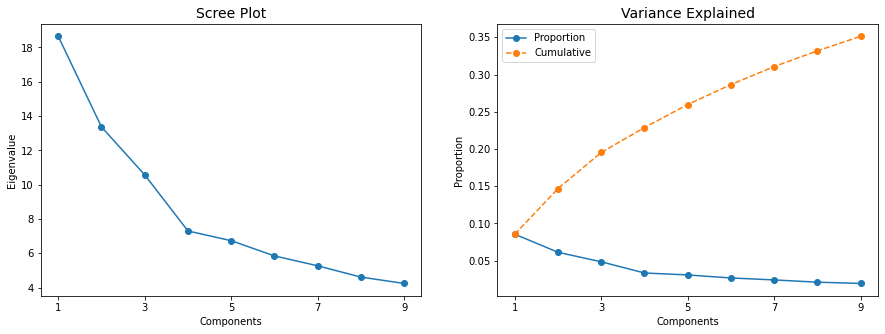

In [60]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [61]:
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP902,POP90C1,POP90C2,POP90C4,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,AGE901,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHN2,HHN6,MARR2,MARR4,DW7,DW8,DW9,HV4,HU3,HU4,HU5,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,HVP2,HUR1,RHP4,HUPA1,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC9,IC10,IC14,IC15,IC16,IC17,IC22,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC1,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC2,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC20,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,CARDPM12,NUMPRM12,RAMNTALL,MINRDATE,MAXRAMNT,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2009-01-01,GRI,0,IL,61081,1957-12-01,-0.019156,-0.274885,-0.146957,-0.034587,-0.1313,XXXX,T2,H,0.054029,F,0.171607,-0.356881,3,-0.206977,0.745798,-0.055596,0.011930,-0.240136,-0.350256,-0.320166,-0.299729,-0.09687,-0.420329,-0.383872,-0.393519,-0.351292,-0.229805,-0.306142,-0.28419,-0.404251,-0.147366,-0.351668,-0.127914,-0.105028,-0.076837,1.052458,-0.412177,-1.235273,0.684696,-0.217719,-0.387486,-0.223937,-0.411007,0.256922,-0.318003,-0.178012,-0.241859,-0.243155,-0.249707,-0.199512,-0.058468,-0.233968,-0.102047,-0.449775,0.542821,-1.043796,0.570857,1.027129,-0.197237,-1.051630,-0.427141,0.681650,0.275532,1.149868,0.486159,-0.076580,0.027298,-0.816497,-0.444526,0.882053,1.372488,-0.156494,-0.835816,0.465714,-0.519690,-0.321105,-0.353743,0.334768,-0.648917,-0.442066,0.035937,-0.054125,-0.440457,-0.510811,-0.331514,-0.637539,-0.593674,0.364485,-0.533671,-0.145106,-1.232565,-0.075511,0.155099,0.626834,-0.098231,-0.191477,-0.874767,0.989500,0.990253,-0.483565,-0.338264,0.471262,-0.147841,-0.904544,0.895769,-0.746148,-0.429073,-0.206928,-0.138679,-0.343702,-0.741218,0.202299,-0.203281,-0.278098,-1.164948,-0.618802,-0.864418,-0.627254,-0.128786,0.243106,0.939209,-1.401205,-0.717487,-0.622342,-1.344233,1.738274,0.107748,-1.133843,-0.421214,0.718882,-0.256270,0.028142,0.618443,2.160262,0.306458,0.086618,-0.292224,-0.827599,2.363671,-1.024576,-1.162464,0.849349,-0.634092,-0.184685,0.103889,-1.018332,1.099332,0.211809,-0.756187,-1.258025,-0.388224,0.700961,-0.528229,-0.525493,-0.191628,0.685501,-0.938287,-0.480644,-0.452344,0.873309,-0.374350,1.001517,0.029293,0.428334,-1.034951,0.332656,-0.27016,0.81935,-0.495530,-0.216497,0.737899,-0.780437,0.235691,0.521963,-0.901694,0.437362,0.122217,-0.344714,-0.636455,1.550839,-0.269449,-0.333052,0.045006,-0.322441,-0.362632,-0.462590,-0.193820,-0.277806,-0.743523,1.007809,-0.201563,-0.375798,0.779032,0.014260,0.121198,0.336945,-0.093485,1.536476,0.402294,0.093516,0.315814,-0.356914,-0.385986,1.069709,-0.569963,-0.707898,-0.471679,-0.143765,-0.509344,1.866657,0.149432,-0.598374,-0.382472,1.454234,0.313229,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01

In [62]:
# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.drop_duplicates()
loadings
#acho que é para ficar assim literalmente e concatenar isto á df original

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
NOEXCH,-0.000140,-0.003399,-0.001492,0.000076,0.001782,0.002333,-0.001498,-0.000310,0.006062
RECINHSE,-0.029953,0.008256,0.052510,-0.031791,0.030011,0.042201,-0.003658,-0.031089,0.024668
RECP3,-0.021544,-0.002760,0.017360,-0.011263,-0.000039,0.001968,-0.008727,-0.014555,0.031378
RECPGVG,-0.003839,0.007792,0.010819,-0.016884,-0.002189,-0.002801,0.009738,-0.008466,0.003694
RECSWEEP,0.005116,-0.000406,0.010100,-0.021893,0.000136,-0.002870,0.005016,-0.009287,0.007799
INCOME,-0.372214,-0.038071,-0.016060,0.162364,0.018647,-0.094653,0.068233,0.042987,0.021470
WEALTH1,-0.514499,-0.131997,0.006069,0.209315,-0.047004,-0.030682,0.023613,-0.017469,0.031749
HIT,-0.063151,-0.019276,0.015790,-0.027532,0.014502,0.087412,-0.048237,0.122016,-0.020573
MALEMILI,-0.014484,0.119816,-0.080064,-0.071447,-0.284663,-0.062180,0.111021,0.090024,-0.302313
MALEVET,-0.087474,-0.409671,0.120882,-0.312986,0.021036,-0.082987,-0.124179,0.108907,-0.315593


## 3) Clustering

In [63]:
data_clustering = data.copy()

In [64]:
data_clustering.shape

(95412, 281)

In [65]:
# Performing HC
#hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5)
#hc_labels = hclust.fit_predict(data_clustering[metric_features])
#hc_labels